# Global Power Plant Database Project

In [1]:
# importing different libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data set
df=pd.read_csv('global_power_plant.csv')

In [3]:
# Finding out the number of rows and columns in the data set.
df.shape 

(908, 25)

From the above Analysis it is clear that the data set contains 908 rows and 25 columns

In [3]:
# Glimpse of the first five rows of the data set
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


From the above analysis it is clear that there are string values, numerical values and Null values present in the data set

In [4]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

From the above analysis it is seen that the data set majorly has string values and rest of the values are of float type.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

1. From the above analysis it is clear that few variables are having high null values or even all the values are null, so removing these variable before further analysing the data


A litte cleaning is required before procedding further for Exploratory data Analysis as in the data set few variables(wepp_id,estimated_generation_gwh) are having all the null values or the majority of the values are null (other_fuel2,other_fuel3,owner). 

In [5]:
df.drop(['other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [7]:
# finding the unique values in the perticular columns
print('country:',df['country'].unique())
print('country_long:',df['country_long'].unique())
print('year_of_capacity_data:',df['year_of_capacity_data'].unique())
print('generaton_data_source:',df['generation_data_source'].unique())

country: ['IND']
country_long: ['India']
year_of_capacity_data: [  nan 2018.]
generaton_data_source: [nan 'Central Electricity Authority']


1. The above four variables (country, country_long, year_of_capacity_data, generation_data_source) can be removed as they have the similar value in all the rows.
2. The data set have three variables as (name,source,url,geolocation_source,gppd_idnr) which do not have role in fullfilling the current objective, so removing these columns as well.

In [8]:
# Droping the above specified columns.
df.drop(['country','country_long','name','source','url','year_of_capacity_data','generation_data_source','geolocation_source','gppd_idnr'],axis=1,inplace=True)

### Exploratory Data analysis (EDA)

#### Summary Statistics

In [9]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


From the above anaysis it is seen that
1. In the variable'capacity_mw' the values spreaded in wide range starting from 0 to 4760 and the 75% value is far from the max value, but we cannot consider it as outlier because that might be due to the actual capacity.
2. 'Latitude & Longitude' values are having their mean value nearly equal to the median value.
3. In 'commisioning_year' variable there are nan values present and that needs to be taken careoff.
4. All the generation growth columns are having mean values very far from the median values that might be bause they have maximum values very far from teh 75%. But we cannot remove the far away values as the power plant capacity might might have generation groth in reality.

#### Analysing one of the target variable'primary_fuel' and another variable 'other_fuel1'.

In [10]:
# Finding out the unique values present in the variable 'primary_fuel'.
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [11]:
# Finding out the value count of the categories present in the variable'primary_fuel'.
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

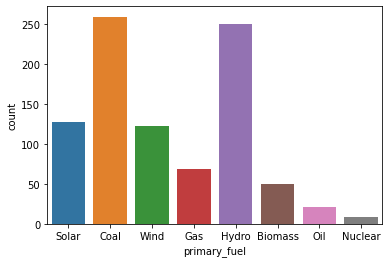

In [15]:
# plotting the count of the categories present in the variable 'primary_fuel'.
sns.countplot(x='primary_fuel',data=df)

1. From the above analysis of the varaible 'primary_fuel' it is clear that there is 8 types of fuel being used out of which 'Coal and Hydro' are the major fuel surces followed by 'solar and wind'. 
2. There are few plants having 'Gas, Biomass and Oil' as fuel.
3. There are only nine plants having the fuel as Neuclear which is lowest among all the fuels.

In [13]:
# Finding out the unique values present in the variable 'other_fuel1'.
df.other_fuel1.unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [14]:
# Finding out the value count of the categories present in the variable'other_fuel1'.
df.other_fuel1.value_counts()

Oil             196
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

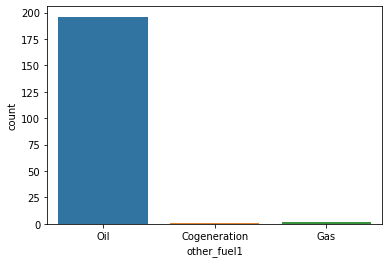

In [17]:
# plotting the count of the categories present in the variable 'other_fuel1'.
sns.countplot(x='other_fuel1',data=df)

1. Out of total number of 908 rows only 199 rows are having data rest are with null values.
2. Out of 199 rows 196 are having 'oil' as the value.
3. Only one values is for Cogeneration as fuel.

In [18]:
# finding out the null values in the data set.
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

From the above analysis it is clear that there are lot of null values present in the data set.

#### Keeping only the rows with at least 4 non-NA values.

In [17]:
df1=df.dropna(thresh=4)
print('shape:',df1.shape)
# This is done after analysing various threshold values as 10,8,7,6,5. Thresh value four is the best to go with.

shape: (874, 11)


Total (908-874=34)rows were removed.

#### Filling the nan values in different columns.

In [18]:
# Filling the Nan values of the variable 'other_fuel1' with the highest frequency value. 
# For that purpose using mode value.
m=df1['other_fuel1'].mode()[0]
m

'Oil'

In [19]:
df1["other_fuel1"].fillna(m,inplace=True)

In [20]:
# Filling the Nan values of the variable 'commiccioning_year' with the highest frequency value(mode).
m1=df1["commissioning_year"].mode()[0]
print('mode1:',m1)
df1["commissioning_year"].fillna(m1,inplace=True)

mode1: 2013.0


In [21]:
# Filling 'latitude'variable with mode value( highest frequency)
m2=df1["latitude"].mode()[0]
print('mode2:',m2)
df1["latitude"].fillna(m1,inplace=True)

mode2: 19.0004


In [22]:
# Filling 'longitude' variable with mode value(highest frequency)
m3=df1["longitude"].mode()[0]
print('mode3:',m3)
df1["longitude"].fillna(m3,inplace=True)

mode3: 71.6917


In [23]:
# Filling 'generation_gwh_2013' variable with median values as this is the middle value of the data.
med=df1['generation_gwh_2013'].median()
med

797.0634749999999

In [24]:
df1['generation_gwh_2013'].fillna(med,inplace=True)

In [25]:
# Filling again with median values.
med1=df1['generation_gwh_2014'].median()
print('med1:',med1)
df1['generation_gwh_2014'].fillna(med1,inplace=True)

med1: 805.76


In [26]:
# Filling again with median values.
med2=df1['generation_gwh_2015'].median()
print('med2:',med2)
df1['generation_gwh_2015'].fillna(med2,inplace=True)

med2: 701.02725


In [27]:
# Filling again with median values.
med3=df1['generation_gwh_2016'].median()
print('med3:',med3)
df1['generation_gwh_2016'].fillna(med3,inplace=True)

med3: 716.7283500000001


In [28]:
# Filling again with median values.
med4=df1['generation_gwh_2017'].median()
print('med4:',med4)
df1['generation_gwh_2017'].fillna(med4,inplace=True)

med4: 807.6016999999999


In [29]:
# Checking the null values once again.
df1.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

No null values are present now.

#### Converting 'primary_fuel and other_fuel1' string values to numeric values.

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Changing the string values in to numerical one.
le=LabelEncoder()

list1=['primary_fuel','other_fuel1']
for val in list1:
    df1[val]=le.fit_transform(df1[val].astype(str))

In [34]:
# Checking the converted data type 
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 907
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          874 non-null    float64
 1   latitude             874 non-null    float64
 2   longitude            874 non-null    float64
 3   primary_fuel         874 non-null    int32  
 4   other_fuel1          874 non-null    int32  
 5   commissioning_year   874 non-null    float64
 6   generation_gwh_2013  874 non-null    float64
 7   generation_gwh_2014  874 non-null    float64
 8   generation_gwh_2015  874 non-null    float64
 9   generation_gwh_2016  874 non-null    float64
 10  generation_gwh_2017  874 non-null    float64
dtypes: float64(9), int32(2)
memory usage: 75.1 KB


From the above analysis it is clear that all teh values are now in numeric data types (either float or int).

<AxesSubplot:>

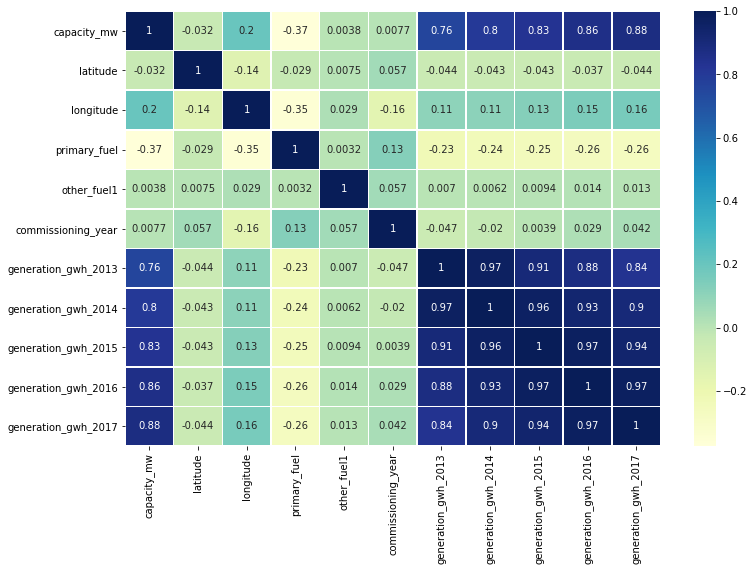

In [35]:
# finding out the correlation between the different variables.
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),cmap='YlGnBu',annot=True,linewidths=.5)

from the above heatmap it is clear that the varables are having high correlation (shown in indigo color). This is because, according to the formula for growth calculation the previous year data is used along with the current year data. hence showing high correlation.

### Seperating the data set in to target(capacity_mw) and predictor (feature) variable.

In [36]:
x=df1.iloc[:,1:]
y=df1.iloc[:,0:1]

In [37]:
x.shape

(874, 10)

In [38]:
x.head(2)

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2,2011.0,797.063475,805.76,701.02725,716.72835,807.6017
1,24.7663,74.6090,1,2,2013.0,797.063475,805.76,701.02725,716.72835,807.6017


In [39]:
y.shape

(874, 1)

In [40]:
y.head(2)

,capacity_mw
0,2.5
1,98.0


### Standardising the data:  Normalising the data

In [41]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

### Splitting the data into training and testing parts

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=45)

In [48]:
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (611, 10)
ytrain shape: (611, 1)
xtest shape: (263, 10)
ytest shape: (263, 1)


## PART A

### Fitting Model for predicting Target variable(capacity_mw)

In [59]:
# importing necessary libraries.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [50]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print('lr coef:',lr.coef_)
print('lr intercept:',lr.intercept_)
pred=lr.predict(xtest)
print('lr score:',lr.score(xtest,ytest))

lr coef: [[   2.49502638    9.31769571  -86.16354181   -4.49795751   -5.85799047
   -12.32317404   34.81259557 -230.03429416  319.79776306  366.59139542]]
lr intercept: [325.84913687]
lr score: 0.7349631719694472


#### Using Regularisation technique

In [51]:
rdg=Ridge(alpha=0.0001, random_state=45)
rdg.fit(xtrain,ytrain)
print('Ridge score:',rdg.score(xtrain,ytrain))
predict=rdg.predict(xtest)
print('r2_score:',r2_score(ytest,predict))

Ridge score: 0.8120645241060036
r2_score: 0.7349634681040536


In [52]:
lso=Lasso(alpha=.0001,random_state=45)
lso.fit(xtrain,ytrain)
print('Lasso score:',lso.score(xtrain,ytrain))
predict1=lso.predict(xtest)
print('r2 score:',r2_score(ytest,predict1))

Lasso score: 0.8120645240965958
r2 score: 0.7349641031448283


In [53]:
en=ElasticNet(alpha=0.0001, random_state=45)
en.fit(xtrain,ytrain)
print('ElasticNet score:',en.score(xtrain,ytrain))
predict2=en.predict(xtest)
print('r2 score:',r2_score(ytest,predict2))

ElasticNet score: 0.8120644620501208
r2 score: 0.7350536233261968


#### Applying other pridiction models.

In [54]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('dtr score:',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('dtr r2_score:', r2_score(ytest,dtrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,dtrpredict))
print("Mean squared error of dtr = ", mean_squared_error(ytest,dtrpredict))
print("Root Mean squared error of dtr = ",np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtr score: 0.9999970719834425
dtr r2_score: 0.7588243480075836
Mean absolute error is= 138.08429657794676
Mean squared error of dtr =  77354.38158407605
Root Mean squared error of dtr =  278.1265567760045


In [55]:
# k=5
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(xtrain,ytrain)
print('knr score:',knr.score(xtrain,ytrain))

knrpredict=knr.predict(xtest)
print('knr r2_score:',r2_score(ytest,knrpredict))

print("Mean absolute error is=",mean_absolute_error(ytest,knrpredict))
print("Mean squareed error of knr =",mean_squared_error(ytest,knrpredict))
print("Root Mean squared error of knr=",np.sqrt(mean_squared_error(ytest,knrpredict)))

knr score: 0.8958245737383718
knr r2_score: 0.7761237632184864
Mean absolute error is= 128.3790859315589
Mean squareed error of knr = 71805.78845558054
Root Mean squared error of knr= 267.966021083981


In [62]:
# k=10
knr1=KNeighborsRegressor(n_neighbors=10)
knr1.fit(xtrain,ytrain)
print('knr1 score:',knr1.score(xtrain,ytrain))

knr1predict=knr1.predict(xtest)
print('knr1 r2_score:',r2_score(ytest,knr1predict))

print("Mean absolute error is =",mean_absolute_error(ytest,knr1predict))
print("Mean squareed error of knr1 =",mean_squared_error(ytest,knr1predict))
print("Root Mean squared error of knr1 =",np.sqrt(mean_squared_error(ytest,knr1predict)))

knr1 score: 0.8650361734337517
knr1 r2_score: 0.7593487352897454
Mean absolute error is = 135.37785855513306
Mean squareed error of knr1 = 77186.19025303963
Root Mean squared error of knr1 = 277.82402749409493


In [63]:
# k=3
knr2=KNeighborsRegressor(n_neighbors=3)
knr2.fit(xtrain,ytrain)
print('knr2 score:',knr2.score(xtrain,ytrain))

knr2predict=knr2.predict(xtest)
print('knr2 r2_score:',r2_score(ytest,knr2predict))

print("Mean absolute error is =",mean_absolute_error(ytest,knr2predict))
print("Mean squareed error of knr2 =",mean_squared_error(ytest,knr2predict))
print("Root Mean squared error of knr2 =",np.sqrt(mean_squared_error(ytest,knr2predict)))

knr2 score: 0.9218909041952058
knr2 r2_score: 0.7914349193702387
Mean absolute error is = 127.67651204055767
Mean squareed error of knr2 = 66894.90708894382
Root Mean squared error of knr2 = 258.6404977743119


In [61]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('sgd score:',sgd.score(xtrain,ytrain))

sgd1predict=sgd.predict(xtest)
print('sgd r2_score:', r2_score(ytest,sgd1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,sgd1predict))
print("Mean squared error of sgd=",mean_squared_error(ytest,sgd1predict))
print("Root Mean squared error of sgd=",np.sqrt(mean_squared_error(ytest,sgd1predict)))

sgd score: 0.8100279177381173
sgd r2_score: 0.7364118053248389
Mean absolute error is= 181.124355813702
Mean squared error of sgd= 84542.95292047672
Root Mean squared error of sgd= 290.76270895779726


From the above fitted models KNeighbors Regressor having k=3 is giving the best scores as r2 score of 79.14% adn RMSE as 258.64 (which is slightly on thehigher side). Now moving for Ensemble Techniques for further improving the scores and in turn improving the model.

### Ensemble Techniques

In [64]:
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
print('rfr score:',rfr.score(xtrain,ytrain))

rfr1predict=rfr.predict(xtest)
print('rfr r2_score:', r2_score(ytest,rfr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,rfr1predict))
print("Mean squared error of rfr=",mean_squared_error(ytest,rfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(ytest,rfr1predict)))

rfr score: 0.9808230887154786
rfr r2_score: 0.8537432080225302
Mean absolute error is= 112.33798759188846
Mean squared error of rfr= 46910.22332653954
Root Mean squared error of rfr= 216.58768045883758


In [65]:
abr=AdaBoostRegressor()
abr.fit(xtrain,ytrain)
print('abr score:',abr.score(xtrain,ytrain))

abr1predict=abr.predict(xtest)
print('abr r2_score:', r2_score(ytest,abr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,abr1predict))
print("Mean squared error of abr=",mean_squared_error(ytest,abr1predict))
print("Root Mean squared error of abr=",np.sqrt(mean_squared_error(ytest,abr1predict)))

abr score: 0.7290039937510979
abr r2_score: 0.6423015668594168
Mean absolute error is= 303.1278824335881
Mean squared error of abr= 114727.75489813062
Root Mean squared error of abr= 338.71485780539746


From teh above two ensemble techniques it is found that Random Forest Regressor is giving the best scores. It is giving r2 score as 85.37% and RMSE value is also reduced a little and comming as 216.58. Now moving ahead with Cross validation of Random Forest Regressor and KNeighbors Regressor with k=3.

### Cross Validation

In [66]:
score=cross_val_score(knr2,xtrain,ytrain,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.86091931 0.86792599 0.88179538 0.83931598 0.76660204 0.86582803
 0.68406453 0.88205462 0.87838435 0.85469687]
0.8381587105417065
0.060629254016161045


In [67]:
score=cross_val_score(rfr,xtrain,ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.88430916 0.87647963 0.80637991 0.78739279 0.88041442]
0.8469951817118435
0.041425975772674206


From the above validation scores it is clear that Random Forest Regressor is giving the best scores as Mean score=84.69% and standard deviation as 0.04. Now miving ahead with Hyper paraetric Tuning for further improving the scores as inturn the model performance.

### Hyper Parametric Tuning

In [68]:
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2','sqrt',None], 
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [69]:
g_search = GridSearchCV(estimator = rfr, 
                        param_grid = param_grid, 
                        cv = 3, 
                        n_jobs = 1,
                        verbose = 0, 
                        return_train_score=True)

In [70]:
g_search.fit(xtrain, ytrain);

In [71]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


In [74]:
modelrfr=RandomForestRegressor(bootstrap= True, max_depth= 10, max_features= 'log2', n_estimators=100 )
modelrfr.fit(xtrain,ytrain)
print('modelrfr score:',modelrfr.score(xtrain,ytrain))

modelrfr1predict=modelrfr.predict(xtest)
print('modelrfr r2_score:', r2_score(ytest,modelrfr1predict))

print("Mean absolute error is=",mean_absolute_error(ytest,modelrfr1predict))
print("Mean squared error of rfr=",mean_squared_error(ytest,modelrfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(ytest,modelrfr1predict)))

modelrfr score: 0.9771099661980645
modelrfr r2_score: 0.852352356431228
Mean absolute error is= 113.62678173650238
Mean squared error of rfr= 47356.3233529377
Root Mean squared error of rfr= 217.61508071118993


From the above Hyper parametr Tuning scores of Random Forest Regressor (r2 score=85.23% and RMSE value=217.61) it is seen that there is no improvement in the scores of the model. Now moving ahead with saving the model for further use. 

### Saving the Model

In [75]:
import joblib

joblib.dump(rfr,'rfr_global_power_plant_model.obj')

rfrloadmodel=joblib.load('rfr_global_power_plant_model.obj')
rfrloadmodel.predict(xtest)

array([  32.762     ,   36.639     ,  580.5372    ,   14.5845    ,
         58.473     ,  955.139     ,   43.095     , 1192.9       ,
        127.5445    , 1140.075     , 1424.845     ,   26.58      ,
        268.4488    ,   50.503     ,  114.94      ,  486.6883    ,
         30.732     ,  852.459     ,   30.253     ,  265.69      ,
         41.9445    ,    4.1355    ,   54.766     ,  126.755     ,
        101.9948    ,  722.034     ,   80.7904    ,  325.61731   ,
       1613.2416    ,    8.23      , 4004.6       ,   12.449     ,
         13.5356    ,    7.306     ,   13.0845    ,  344.811     ,
         16.2268    ,   38.999     ,  257.77022   ,    5.        ,
         16.129     ,  360.12751   ,   42.06      ,   20.061     ,
         39.265     ,  172.978     ,   58.978     ,  265.7865    ,
         50.413     ,   43.356     ,   95.867     ,   21.825     ,
         42.843     , 1159.1148    ,   15.363     ,  139.661     ,
        113.62836667, 3760.        ,    7.3       ,   34.918  

## PART B

### Predicting the fuel category

In [76]:
df1.head(2)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2,2011.0,797.063475,805.76,701.02725,716.72835,807.6017
1,98.0,24.7663,74.6090,1,2,2013.0,797.063475,805.76,701.02725,716.72835,807.6017


### Dividing the data set into target variable (primary_fuel) and predictor (feature) variables.

In [77]:
X=df1.drop(['primary_fuel'],axis=1)
Y=df1['primary_fuel']

In [78]:
X.head(2)

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2,2011.0,797.063475,805.76,701.02725,716.72835,807.6017
1,98.0,24.7663,74.6090,2,2013.0,797.063475,805.76,701.02725,716.72835,807.6017


In [79]:
Y.head(2)

0    6
1    1
Name: primary_fuel, dtype: int32

### Standardadising the Data:  Normalising the data

In [80]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(X)

### Splitting the dataset into training and testing parts

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.30,random_state=45)

In [83]:
print('Xtrain shape:',Xtrain.shape)
print('Xtest shape:',Xtest.shape)
print('Ytrain shape:',Ytrain.shape)
print('Ytest shape:',Ytest.shape)

Xtrain shape: (611, 10)
Xtest shape: (263, 10)
Ytrain shape: (611,)
Ytest shape: (263,)


### Fitting the Models

In [84]:
lr1=LinearRegression()
lr1.fit(Xtrain,Ytrain)
print('lr1 coef:',lr1.coef_)
print('lr1 intercept:',lr1.intercept_)
pred=lr1.predict(Xtest)
print('lr1 score:',lr1.score(Xtest,Ytest))

lr1 coef: [-1.27045019 -0.12369644 -0.68174962 -0.12291814  0.16431967 -0.01021363
  0.3457842  -0.88249888  0.75370903  0.38356573]
lr1 intercept: 3.150138626108981
lr1 score: 0.18495931032049373


#### Using Regularisation Techniques

In [85]:
rdg1=Ridge(alpha=0.0001, random_state=45)
rdg1.fit(Xtrain,Ytrain)
print('Ridge1 score:',rdg1.score(Xtrain,Ytrain))
predict=rdg1.predict(Xtest)
print('r2_score:',r2_score(Ytest,predict))

Ridge1 score: 0.26287611072561434
r2_score: 0.18495970113122295


In [86]:
lso1=Lasso(alpha=.0001,random_state=45)
lso1.fit(Xtrain,Ytrain)
print('Lasso score:',lso1.score(Xtrain,Ytrain))
predict1=lso1.predict(Xtest)
print('r2 score:',r2_score(Ytest,predict1))

Lasso score: 0.2628753732997209
r2 score: 0.18531536937715876


In [87]:
en1=ElasticNet(alpha=0.0001, random_state=45)
en1.fit(Xtrain,Ytrain)
print('ElasticNet score:',en1.score(Xtrain,Ytrain))
predict2=en1.predict(Xtest)
print('r2 score:',r2_score(Ytest,predict2))

ElasticNet score: 0.2628756538764331
r2 score: 0.18525511889834434


#### Developing other models

In [95]:
dtr1=DecisionTreeRegressor(criterion='mse')
dtr1.fit(Xtrain,Ytrain)
print('dtr1 score:',dtr1.score(Xtrain,Ytrain))

dtr1predict=dtr1.predict(Xtest)
print('dtr1 r2_score:', r2_score(Ytest,dtr1predict))

print("Mean absolute error is =",mean_absolute_error(Ytest,dtr1predict))
print("Mean squared error of dtr1 = ", mean_squared_error(Ytest,dtr1predict))
print("Root Mean squared error of dtr1 = ",np.sqrt(mean_squared_error(Ytest,dtr1predict)))

dtr1 score: 1.0
dtr1 r2_score: 0.2786782070454821
Mean absolute error is = 0.8973384030418251
Mean squared error of dtr1 =  3.612167300380228
Root Mean squared error of dtr1 =  1.9005702566283174


In [94]:
knr1=KNeighborsRegressor()
knr1.fit(Xtrain,Ytrain)
print('knr1 score:',knr1.score(Xtrain,Ytrain))

knr1predict=knr1.predict(Xtest)
print('knr1 r2_score:',r2_score(Ytest,knr1predict))

print("Mean absolute error is =",mean_absolute_error(Ytest,knr1predict))
print("Mean squareed error of knr1 =",mean_squared_error(Ytest,knrpredict))
print("Root Mean squared error of knr1=",np.sqrt(mean_squared_error(Ytest,knr1predict)))

knr1 score: 0.6707102339172167
knr1 r2_score: 0.31342313888295437
Mean absolute error is = 1.193916349809886
Mean squareed error of knr1 = 313008.0240308754
Root Mean squared error of knr1= 1.854231621168986


In [93]:
sgd1=SGDRegressor()
sgd1.fit(Xtrain,Ytrain)
print('sgd1 score:',sgd1.score(Xtrain,Ytrain))

sgd1predict=sgd1.predict(Xtest)
print('sgd1 r2_score:', r2_score(Ytest,sgd1predict))

print("Mean absolute error is =",mean_absolute_error(Ytest,sgd1predict))
print("Mean squared error of sgd1 =",mean_squared_error(Ytest,sgd1predict))
print("Root Mean squared error of sgd1 =",np.sqrt(mean_squared_error(Ytest,sgd1predict)))

sgd1 score: 0.26026035406284054
sgd1 r2_score: 0.1988857515613187
Mean absolute error is = 1.62639982370151
Mean squared error of sgd1 = 4.011744439643389
Root Mean squared error of sgd1 = 2.0029339578836316


From the above fitted models the scores of Decision tree are best with r2 score of 35.6% and RMSE value as 1.79. Now moving ahead with ensemble techniques to improve the model scores in turn its performance

### Ensemble Techniques

In [92]:
rfr1=RandomForestRegressor()
rfr1.fit(Xtrain,Ytrain)
print('rfr1 score:',rfr1.score(Xtrain,Ytrain))

rfrpredict=rfr1.predict(Xtest)
print('rfr r2_score:', r2_score(Ytest,rfrpredict))

print("Mean absolute error is =",mean_absolute_error(Ytest,rfrpredict))
print("Mean squared error of sgd=",mean_squared_error(Ytest,rfrpredict))
print("Root Mean squared error of sgd=",np.sqrt(mean_squared_error(Ytest,rfrpredict)))

rfr1 score: 0.9501957009148582
rfr r2_score: 0.602928905415471
Mean absolute error is = 0.9180988593155894
Mean squared error of sgd= 1.988415209125475
Root Mean squared error of sgd= 1.410111771855506


In [96]:
abr1=AdaBoostRegressor()
abr1.fit(Xtrain,Ytrain)
print('abr1 score:',abr1.score(Xtrain,Ytrain))

abrpredict=abr1.predict(Xtest)
print('abr r2_score:', r2_score(Ytest,abrpredict))

print("Mean absolute error is=",mean_absolute_error(Ytest,abrpredict))
print("Mean squared error of abr=",mean_squared_error(Ytest,abrpredict))
print("Root Mean squared error of abr=",np.sqrt(mean_squared_error(Ytest,abrpredict)))

abr1 score: 0.564448178147918
abr r2_score: 0.4302982195038848
Mean absolute error is= 1.2285268953715753
Mean squared error of abr= 2.852898890032867
Root Mean squared error of abr= 1.689052660526861


From the above fitted Ensemble techniques it is clear that Rando Forest Regressor is working best among all. It is giving the r2 score as 60.29% and RMSE value as 1.41. Now moving ahead with cross validation to validate the model performance.

### Cross Validation

In [104]:
score=cross_val_score(rfr1,Xtrain,Ytrain,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.6920857  0.62468427 0.52082876 0.6402466  0.56663872 0.56739989
 0.61928818 0.72166931 0.48478013 0.7812607 ]
0.6218882253845673
0.08698751440428268


In [105]:
score=cross_val_score(rfr1,Xtrain,Ytrain,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.67228628 0.60462173 0.53347565 0.60977293 0.62096068]
0.6082234550833987
0.044427222771345684


From the above cross validation scores it is clear that the model's mean score is 62.18 % and Standard Deviation is 0.086. Now moving ahead with HYper parameter Tuning of Random Forest Regressor.

### Hyper Parameter Tuning

In [106]:
param_grid = {  'bootstrap': [True], 
              'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2','sqrt',None], 
              'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [107]:
g_search = GridSearchCV(estimator = rfr1, 
                        param_grid = param_grid, 
                        cv = 3, 
                        n_jobs = 1,
                        verbose = 0, 
                        return_train_score=True)

In [108]:
g_search.fit(Xtrain, Ytrain);

In [109]:
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}


In [110]:
modelrfr=RandomForestRegressor(bootstrap= True, max_depth= None, max_features= 'sqrt', n_estimators=100 )
modelrfr.fit(Xtrain,Ytrain)
print('modelrfr score:',modelrfr.score(Xtrain,Ytrain))

modelrfr1predict=modelrfr.predict(Xtest)
print('modelrfr r2_score:', r2_score(Ytest,modelrfr1predict))

print("Mean absolute error is=",mean_absolute_error(Ytest,modelrfr1predict))
print("Mean squared error of rfr=",mean_squared_error(Ytest,modelrfr1predict))
print("Root Mean squared error of rfr=",np.sqrt(mean_squared_error(Ytest,modelrfr1predict)))

modelrfr score: 0.952322435439659
modelrfr r2_score: 0.626258578200694
Mean absolute error is= 0.9208365019011406
Mean squared error of rfr= 1.8715870722433459
Root Mean squared error of rfr= 1.36805960112977


From the Hyper parameter Tuning the scores of Random Forest Regessor Model has improved a little and new r2 score of 62.62% and RMSE value as 1.36. Hence saving this model for further use.

### Saving the best Model

In [113]:
import joblib

joblib.dump(modelrfr,'modelrfr_global_power_plant_fuel_pred_model.obj')

modelrfrloadmodel=joblib.load('modelrfr_global_power_plant_fuel_pred_model.obj')
pred=modelrfrloadmodel.predict(Xtest)
print(pred)

[3.18 4.95 1.28 2.79 1.82 1.17 6.95 1.11 2.94 1.23 1.07 5.96 2.38 6.44
 2.85 2.48 1.31 1.76 2.07 1.77 2.98 5.37 3.97 2.31 1.47 1.28 3.01 2.43
 1.1  6.05 1.48 3.22 3.8  5.9  3.11 2.28 1.96 3.97 2.46 6.   3.11 3.48
 0.57 5.75 4.03 2.09 5.96 2.57 3.92 6.95 1.85 2.57 2.37 2.14 3.3  2.72
 3.19 1.   6.05 6.52 3.65 2.57 2.62 1.15 5.44 1.19 2.03 2.96 2.95 6.
 1.08 2.79 1.32 3.7  2.29 2.82 2.66 6.31 2.63 1.05 2.   1.97 6.13 6.49
 6.2  2.02 5.8  0.77 3.27 2.22 2.92 3.61 5.85 5.58 1.52 2.11 2.73 6.08
 4.01 3.33 2.6  6.03 4.09 2.7  1.25 6.28 3.42 3.02 1.26 2.93 1.75 3.7
 3.03 6.71 6.17 2.31 2.87 3.32 5.36 1.18 5.57 3.18 5.54 5.7  1.53 4.1
 2.12 1.64 1.23 1.3  2.51 2.04 3.54 3.07 1.61 2.21 6.92 2.56 3.17 1.04
 4.83 1.05 0.95 1.61 3.02 5.52 2.91 0.66 2.99 1.36 1.88 5.9  3.94 4.1
 3.87 1.96 2.54 6.64 2.83 3.3  5.64 1.38 2.57 2.45 1.9  6.26 1.4  1.52
 3.   2.22 2.39 2.99 2.96 3.9  4.66 3.04 3.3  1.1  1.84 5.68 1.02 6.16
 6.24 0.69 2.23 3.24 3.09 2.28 4.19 3.29 5.37 2.3  2.39 0.79 5.79 1.43
 2.32 1.65 

In [119]:
p=np.round(pred,0)
p

array([3., 5., 1., 3., 2., 1., 7., 1., 3., 1., 1., 6., 2., 6., 3., 2., 1.,
       2., 2., 2., 3., 5., 4., 2., 1., 1., 3., 2., 1., 6., 1., 3., 4., 6.,
       3., 2., 2., 4., 2., 6., 3., 3., 1., 6., 4., 2., 6., 3., 4., 7., 2.,
       3., 2., 2., 3., 3., 3., 1., 6., 7., 4., 3., 3., 1., 5., 1., 2., 3.,
       3., 6., 1., 3., 1., 4., 2., 3., 3., 6., 3., 1., 2., 2., 6., 6., 6.,
       2., 6., 1., 3., 2., 3., 4., 6., 6., 2., 2., 3., 6., 4., 3., 3., 6.,
       4., 3., 1., 6., 3., 3., 1., 3., 2., 4., 3., 7., 6., 2., 3., 3., 5.,
       1., 6., 3., 6., 6., 2., 4., 2., 2., 1., 1., 3., 2., 4., 3., 2., 2.,
       7., 3., 3., 1., 5., 1., 1., 2., 3., 6., 3., 1., 3., 1., 2., 6., 4.,
       4., 4., 2., 3., 7., 3., 3., 6., 1., 3., 2., 2., 6., 1., 2., 3., 2.,
       2., 3., 3., 4., 5., 3., 3., 1., 2., 6., 1., 6., 6., 1., 2., 3., 3.,
       2., 4., 3., 5., 2., 2., 1., 6., 1., 2., 2., 1., 2., 1., 6., 3., 3.,
       3., 3., 1., 3., 3., 4., 4., 3., 2., 2., 2., 2., 3., 3., 7., 1., 3.,
       3., 6., 4., 3., 2.